In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import newton
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
nifty_put = pd.read_csv('NIFTY PE.csv')

In [3]:
nifty_put.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,NIFTY,02-May-2024,30-May-2024,PE,20050.0,7.55,7.95,5.70,6.15,5.70,6.15,1181.00,5921.79,2.02,113950.00,500.00,22648.2
1,NIFTY,02-May-2024,30-May-2024,PE,20100.0,7.25,7.60,5.45,5.80,5.65,5.80,6331.00,31823.27,9.99,836300.00,-17600.00,22648.2
2,NIFTY,02-May-2024,30-May-2024,PE,20150.0,7.20,8.45,5.70,5.80,6.45,5.80,79.00,398.10,0.13,8650.00,675.00,22648.2
3,NIFTY,02-May-2024,30-May-2024,PE,20200.0,8.05,8.30,5.50,6.00,6.20,6.00,2463.00,12442.40,4.25,111350.00,-6900.00,22648.2
4,NIFTY,02-May-2024,30-May-2024,PE,20250.0,8.50,8.50,5.65,5.90,5.65,5.90,279.00,1412.91,0.47,39800.00,-,22648.2


In [4]:
nifty_put.tail()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
1811,NIFTY,29-May-2024,30-May-2024,PE,24500.0,1627.45,1774.15,1627.45,1751.75,1771.70,1751.75,3220.00,21106.37,1383.87,182075.00,-48000.00,22704.7
1812,NIFTY,29-May-2024,30-May-2024,PE,24550.0,-,-,-,2206.65,-,1840.55,-,-,-,-,-,22704.7
1813,NIFTY,29-May-2024,30-May-2024,PE,24600.0,-,-,-,2251.00,-,1890.55,-,-,-,-,-,22704.7
1814,NIFTY,29-May-2024,30-May-2024,PE,24650.0,-,-,-,2295.60,-,1940.55,-,-,-,-,-,22704.7
1815,NIFTY,29-May-2024,30-May-2024,PE,24700.0,1834.35,1962.95,1834.35,1960.80,1960.80,1990.55,3.00,19.96,1.44,25.00,25.00,22704.7


In [5]:
nifty_put.index

RangeIndex(start=0, stop=1816, step=1)

In [6]:
nifty_put.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

In [7]:
nifty_put.replace(to_replace='-',value=0,inplace=True)

In [8]:
nifty_put.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Symbol                            1816 non-null   object 
 1   Date                              1816 non-null   object 
 2   Expiry                            1816 non-null   object 
 3   Option type                       1816 non-null   object 
 4   Strike Price                      1816 non-null   float64
 5   Open                              1816 non-null   object 
 6   High                              1816 non-null   object 
 7   Low                               1816 non-null   object 
 8   Close                             1816 non-null   float64
 9   LTP                               1816 non-null   object 
 10  Settle Price                      1816 non-null   float64
 11  No. of contracts                  1816 non-null   object 
 12  Turnov

In [9]:
# The datatype of some columns are unworkable in their present form

convert_dict = {'LTP  ':float,'No. of contracts  ':float}

nifty_put = nifty_put.astype(convert_dict)

In [10]:
nifty_put['Date  '] = pd.to_datetime(nifty_put['Date  '])
nifty_put['Expiry  ']= pd.to_datetime(nifty_put['Expiry  '])

In [11]:
# Dropping unnecessary columns

nifty_put_drop = nifty_put.drop(labels=['Open  ', 'High  ', 'Low  ','Turnover * in  ₹ Lakhs','Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ','LTP  '],axis=1)

In [12]:
nifty_put_drop.head()

,Symbol,Date,Expiry,Option type,Strike Price,Close,Settle Price,No. of contracts,Underlying Value
0,NIFTY,2024-05-02,2024-05-30,PE,20050.0,6.15,6.15,1181.0,22648.2
1,NIFTY,2024-05-02,2024-05-30,PE,20100.0,5.80,5.80,6331.0,22648.2
2,NIFTY,2024-05-02,2024-05-30,PE,20150.0,5.80,5.80,79.0,22648.2
3,NIFTY,2024-05-02,2024-05-30,PE,20200.0,6.00,6.00,2463.0,22648.2
4,NIFTY,2024-05-02,2024-05-30,PE,20250.0,5.90,5.90,279.0,22648.2


In [13]:
# Dropping rows with no contracts

nifty_put_clean = nifty_put_drop[nifty_put_drop['No. of contracts  ']>0]
nifty_put_clean

,Symbol,Date,Expiry,Option type,Strike Price,Close,Settle Price,No. of contracts,Underlying Value
0,NIFTY,2024-05-02,2024-05-30,PE,20050.0,6.15,6.15,1181.0,22648.2
1,NIFTY,2024-05-02,2024-05-30,PE,20100.0,5.80,5.80,6331.0,22648.2
2,NIFTY,2024-05-02,2024-05-30,PE,20150.0,5.80,5.80,79.0,22648.2
3,NIFTY,2024-05-02,2024-05-30,PE,20200.0,6.00,6.00,2463.0,22648.2
4,NIFTY,2024-05-02,2024-05-30,PE,20250.0,5.90,5.90,279.0,22648.2
...,...,...,...,...,...,...,...,...,...
1805,NIFTY,2024-05-29,2024-05-30,PE,24200.0,1467.20,1467.20,23.0,22704.7
1806,NIFTY,2024-05-29,2024-05-30,PE,24250.0,1480.05,1540.60,6.0,22704.7
1810,NIFTY,2024-05-29,2024-05-30,PE,24450.0,1601.55,1740.60,4.0,22704.7
1811,NIFTY,2024-05-29,2024-05-30,PE,24500.0,1751.75,1751.75,3220.0,22704.7


In [14]:
nifty_put_clean['Date  '].nunique()

20

In [15]:
nifty_put_clean['Maturity Time'] = (nifty_put_clean['Expiry  '] - nifty_put_clean['Date  ']).dt.days/365

C:\Users\amols\AppData\Local\Temp\ipykernel_21308\2675465190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_put_clean['Maturity Time'] = (nifty_put_clean['Expiry  '] - nifty_put_clean['Date  ']).dt.days/365


In [16]:
# Code for Black Scholes 

def blackScholes_put(r, S, K, T, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return round(price, 2)

In [17]:
# Code for Binomial Pricing Method

def binomial_crr(K,T,S0,r,N,sigma,opttype='P'):
    #precompute constants
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return round(C[0],2)

In [18]:
# Monte Carlo Simulation

# Adapted from an implementation provided by OpenAI's ChatGPT language model,
# Specifically tailored for pricing European Put options using the Monte Carlo method.


def monte_carlo_put(S, K, T, r, sigma, num_simulations):
    dt = T / 365  # Time step (assuming 365 days in a year)
    np.random.seed(42)  # for reproducibility
    stock_prices = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        # Simulating stock price using geometric Brownian motion
        Z = np.random.normal(0, 1, 1)
        stock_price = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
        stock_prices[i] = stock_price
    
    # Calculate option payoff for put options
    put_payoffs = np.maximum(K - stock_prices, 0)
    
    # Discounting the expected payoff to present value
    put_price = np.exp(-r * T) * np.mean(put_payoffs)
    
    return round(put_price, 2)

In [19]:
from scipy.optimize import brentq

def implied_volatility_call(market_price, S, K, T, r):
    def error_function(sigma, market_price, S, K, T, r):
        return blackScholes_put(r, S, K, T, sigma) - market_price
    
    # Using Brent's method to find the root (implied volatility)
    implied_volatility = brentq(error_function, -1, 5.0, args=(market_price, S, K, T, r), xtol=1e-6)
    return implied_volatility

In [20]:
# Risk Free Rate 
risk_free = 0.07

# Number of time steps in Binomial Method
time_steps = 2

# No. of simulations for Monte Carlo= 10000
sims = 10000

In [21]:
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
nifty_data = pd.read_csv('NIFTY Historical Data.csv')

In [23]:
nifty_data.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,02-Jan-23,18131.70,18215.15,18086.50,18197.45
1,NIFTY 50,03-Jan-23,18163.20,18251.95,18149.80,18232.55
2,NIFTY 50,04-Jan-23,18230.65,18243.00,18020.60,18042.95
3,NIFTY 50,05-Jan-23,18101.95,18120.30,17892.60,17992.15
4,NIFTY 50,06-Jan-23,18008.05,18047.40,17795.55,17859.45


In [24]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  348 non-null    object 
 1   Date        348 non-null    object 
 2   Open        348 non-null    float64
 3   High        348 non-null    float64
 4   Low         348 non-null    float64
 5   Close       348 non-null    float64
dtypes: float64(4), object(2)
memory usage: 16.5+ KB


In [25]:
nifty_data.columns

Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [26]:
nifty_data['Returns'] = 100*nifty_data['Close'].pct_change().dropna()

C:\Users\amols\AppData\Local\Temp\ipykernel_21308\2674472825.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  nifty_data['Returns'] = 100*nifty_data['Close'].pct_change().dropna()


In [27]:
# Calculate Daily Volatility using EWMA Model
lambda_ = 0.94  # Smoothing parameter
daily_volatility_ewma = nifty_data['Returns'].ewm(alpha=lambda_).std()

In [28]:
# Fit GARCH(1,1) Model
garch_model = arch_model(nifty_data['Returns'].dropna(),vol="Garch", p=1, o=0, q=1, dist="Normal")
garch_fit = garch_model.fit(disp='off')
daily_volatility_garch = garch_fit.conditional_volatility

In [29]:
nifty_data['EWMA_Vol_Annual'] = (daily_volatility_ewma * np.sqrt(252))/100
nifty_data['GARCH_Vol_Annual'] = (daily_volatility_garch * np.sqrt(252))/100

In [30]:
nifty_data

,Index Name,Date,Open,High,Low,Close,Returns,EWMA_Vol_Annual,GARCH_Vol_Annual
0,NIFTY 50,02-Jan-23,18131.70,18215.15,18086.50,18197.45,NaN,NaN,NaN
1,NIFTY 50,03-Jan-23,18163.20,18251.95,18149.80,18232.55,0.192884,NaN,0.116084
2,NIFTY 50,04-Jan-23,18230.65,18243.00,18020.60,18042.95,-1.039898,0.138380,0.114787
3,NIFTY 50,05-Jan-23,18101.95,18120.30,17892.60,17992.15,-0.281550,0.083891,0.115647
4,NIFTY 50,06-Jan-23,18008.05,18047.40,17795.55,17859.45,-0.737544,0.050805,0.114551
...,...,...,...,...,...,...,...,...,...
344,NIFTY 50,24-May-24,22930.75,23026.40,22908.00,22957.10,-0.045934,0.183252,0.102943
345,NIFTY 50,27-May-24,23038.95,23110.80,22871.20,22932.45,-0.107374,0.048234,0.102066
346,NIFTY 50,28-May-24,22977.15,22998.55,22858.50,22888.15,-0.193176,0.015922,0.101253
347,NIFTY 50,29-May-24,22762.75,22825.50,22685.45,22704.70,-0.801506,0.068913,0.100543


In [31]:
nifty_data.iloc[-21:-1,:]

,Index Name,Date,Open,High,Low,Close,Returns,EWMA_Vol_Annual,GARCH_Vol_Annual
328,NIFTY 50,02-May-24,22567.85,22710.50,22567.85,22648.20,0.191773,0.045788,0.101630
329,NIFTY 50,03-May-24,22766.35,22794.70,22348.05,22475.85,-0.760988,0.105352,0.100801
330,NIFTY 50,06-May-24,22561.60,22588.80,22409.45,22442.70,-0.147492,0.067577,0.101337
331,NIFTY 50,07-May-24,22489.75,22499.05,22232.05,22302.50,-0.624702,0.052406,0.100580
332,NIFTY 50,08-May-24,22231.20,22368.65,22185.20,22302.50,0.000000,0.068231,0.100715
333,NIFTY 50,09-May-24,22224.80,22307.75,21932.40,21957.50,-1.546912,0.170130,0.099896
334,NIFTY 50,10-May-24,21990.95,22131.30,21950.30,22055.20,0.444950,0.217063,0.104227
335,NIFTY 50,13-May-24,22027.95,22131.65,21821.05,22104.05,0.221490,0.054564,0.103555
336,NIFTY 50,14-May-24,22112.90,22270.05,22081.25,22217.85,0.514838,0.034802,0.102677
337,NIFTY 50,15-May-24,22255.60,22297.55,22151.75,22200.55,-0.077865,0.065044,0.102173


In [32]:
nifty_data.columns

Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Returns',
       'EWMA_Vol_Annual', 'GARCH_Vol_Annual'],
      dtype='object')

In [33]:
nifty_put_vol = nifty_data.iloc[-21:-1,:]

In [34]:
nifty_put_vol= nifty_put_vol.drop(labels=['Index Name', 'Open', 'High', 'Low', 'Close', 'Returns'],axis=1)

In [35]:
nifty_put_vol

,Date,EWMA_Vol_Annual,GARCH_Vol_Annual
328,02-May-24,0.045788,0.101630
329,03-May-24,0.105352,0.100801
330,06-May-24,0.067577,0.101337
331,07-May-24,0.052406,0.100580
332,08-May-24,0.068231,0.100715
333,09-May-24,0.170130,0.099896
334,10-May-24,0.217063,0.104227
335,13-May-24,0.054564,0.103555
336,14-May-24,0.034802,0.102677
337,15-May-24,0.065044,0.102173


In [36]:
nifty_put_vol.rename(columns = {'Date':'Date  '}, inplace = True)
nifty_put_vol['Date  '] = pd.to_datetime(nifty_put_vol['Date  '])

C:\Users\amols\AppData\Local\Temp\ipykernel_21308\3815056101.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nifty_put_vol['Date  '] = pd.to_datetime(nifty_put_vol['Date  '])


In [37]:
pd.merge(nifty_put_clean,nifty_put_vol,how='left',on='Date  ')

,Symbol,Date,Expiry,Option type,Strike Price,Close,Settle Price,No. of contracts,Underlying Value,Maturity Time,EWMA_Vol_Annual,GARCH_Vol_Annual
0,NIFTY,2024-05-02,2024-05-30,PE,20050.0,6.15,6.15,1181.0,22648.2,0.076712,0.045788,0.101630
1,NIFTY,2024-05-02,2024-05-30,PE,20100.0,5.80,5.80,6331.0,22648.2,0.076712,0.045788,0.101630
2,NIFTY,2024-05-02,2024-05-30,PE,20150.0,5.80,5.80,79.0,22648.2,0.076712,0.045788,0.101630
3,NIFTY,2024-05-02,2024-05-30,PE,20200.0,6.00,6.00,2463.0,22648.2,0.076712,0.045788,0.101630
4,NIFTY,2024-05-02,2024-05-30,PE,20250.0,5.90,5.90,279.0,22648.2,0.076712,0.045788,0.101630
...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NIFTY,2024-05-29,2024-05-30,PE,24200.0,1467.20,1467.20,23.0,22704.7,0.002740,0.068913,0.100543
1700,NIFTY,2024-05-29,2024-05-30,PE,24250.0,1480.05,1540.60,6.0,22704.7,0.002740,0.068913,0.100543
1701,NIFTY,2024-05-29,2024-05-30,PE,24450.0,1601.55,1740.60,4.0,22704.7,0.002740,0.068913,0.100543
1702,NIFTY,2024-05-29,2024-05-30,PE,24500.0,1751.75,1751.75,3220.0,22704.7,0.002740,0.068913,0.100543


In [38]:
nifty_put_merged = pd.merge(nifty_put_clean,nifty_put_vol,how='left',on='Date  ')

In [39]:
nifty_put_merged['BS_EWMA'] = np.vectorize(blackScholes_put)(risk_free,nifty_put_merged['Underlying Value  '],nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],nifty_put_merged['EWMA_Vol_Annual'])

In [40]:
nifty_put_merged['BIN_EWMA'] = np.vectorize(binomial_crr)(nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],nifty_put_merged['Underlying Value  '],risk_free,time_steps,nifty_put_merged['EWMA_Vol_Annual'],'P')


In [41]:
nifty_put_merged['MC_EWMA'] =  np.vectorize(monte_carlo_put)(nifty_put_merged['Underlying Value  '],nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],risk_free,nifty_put_merged['EWMA_Vol_Annual'],sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_21308\1110072492.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [42]:
nifty_put_merged['BS_GARCH'] = np.vectorize(blackScholes_put)(risk_free,nifty_put_merged['Underlying Value  '],nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],nifty_put_merged['GARCH_Vol_Annual'])

In [43]:
nifty_put_merged['BIN_GARCH'] = np.vectorize(binomial_crr)(nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],nifty_put_merged['Underlying Value  '],risk_free,time_steps,nifty_put_merged['GARCH_Vol_Annual'],'P')


In [44]:
nifty_put_merged['MC_GARCH'] = np.vectorize(monte_carlo_put)(nifty_put_merged['Underlying Value  '],nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],risk_free,nifty_put_merged['GARCH_Vol_Annual'],sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_21308\1110072492.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [45]:
nifty_put_merged.head()

,Symbol,Date,Expiry,Option type,Strike Price,Close,Settle Price,No. of contracts,Underlying Value,Maturity Time,EWMA_Vol_Annual,GARCH_Vol_Annual,BS_EWMA,BIN_EWMA,MC_EWMA,BS_GARCH,BIN_GARCH,MC_GARCH
0,NIFTY,2024-05-02,2024-05-30,PE,20050.0,6.15,6.15,1181.0,22648.2,0.076712,0.045788,0.10163,0.0,0.0,0.0,0.0,0.0,0.0
1,NIFTY,2024-05-02,2024-05-30,PE,20100.0,5.80,5.80,6331.0,22648.2,0.076712,0.045788,0.10163,0.0,0.0,0.0,0.0,0.0,0.0
2,NIFTY,2024-05-02,2024-05-30,PE,20150.0,5.80,5.80,79.0,22648.2,0.076712,0.045788,0.10163,0.0,0.0,0.0,0.0,0.0,0.0
3,NIFTY,2024-05-02,2024-05-30,PE,20200.0,6.00,6.00,2463.0,22648.2,0.076712,0.045788,0.10163,0.0,0.0,0.0,0.0,0.0,0.0
4,NIFTY,2024-05-02,2024-05-30,PE,20250.0,5.90,5.90,279.0,22648.2,0.076712,0.045788,0.10163,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
nifty_put_merged['Implied Volatility']=np.vectorize(implied_volatility_call)(nifty_put_merged['Close  '],nifty_put_merged['Underlying Value  '],nifty_put_merged['Strike Price  '],nifty_put_merged['Maturity Time'],risk_free)

In [47]:
nifty_put_merged

,Symbol,Date,Expiry,Option type,Strike Price,Close,Settle Price,No. of contracts,Underlying Value,Maturity Time,EWMA_Vol_Annual,GARCH_Vol_Annual,BS_EWMA,BIN_EWMA,MC_EWMA,BS_GARCH,BIN_GARCH,MC_GARCH,Implied Volatility
0,NIFTY,2024-05-02,2024-05-30,PE,20050.0,6.15,6.15,1181.0,22648.2,0.076712,0.045788,0.101630,0.00,0.00,0.00,0.00,0.00,0.00,2.094872e-01
1,NIFTY,2024-05-02,2024-05-30,PE,20100.0,5.80,5.80,6331.0,22648.2,0.076712,0.045788,0.101630,0.00,0.00,0.00,0.00,0.00,0.00,2.042352e-01
2,NIFTY,2024-05-02,2024-05-30,PE,20150.0,5.80,5.80,79.0,22648.2,0.076712,0.045788,0.101630,0.00,0.00,0.00,0.00,0.00,0.00,2.006976e-01
3,NIFTY,2024-05-02,2024-05-30,PE,20200.0,6.00,6.00,2463.0,22648.2,0.076712,0.045788,0.101630,0.00,0.00,0.00,0.00,0.00,0.00,1.980816e-01
4,NIFTY,2024-05-02,2024-05-30,PE,20250.0,5.90,5.90,279.0,22648.2,0.076712,0.045788,0.101630,0.00,0.00,0.00,0.00,0.00,0.00,1.940671e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NIFTY,2024-05-29,2024-05-30,PE,24200.0,1467.20,1467.20,23.0,22704.7,0.002740,0.068913,0.100543,1490.66,1490.66,1490.83,1490.66,1490.66,1490.91,4.119547e-07
1700,NIFTY,2024-05-29,2024-05-30,PE,24250.0,1480.05,1540.60,6.0,22704.7,0.002740,0.068913,0.100543,1540.65,1540.65,1540.82,1540.65,1540.65,1540.90,4.413591e-07
1701,NIFTY,2024-05-29,2024-05-30,PE,24450.0,1601.55,1740.60,4.0,22704.7,0.002740,0.068913,0.100543,1740.61,1740.61,1740.79,1740.61,1740.61,1740.86,7.039071e-08
1702,NIFTY,2024-05-29,2024-05-30,PE,24500.0,1751.75,1751.75,3220.0,22704.7,0.002740,0.068913,0.100543,1790.60,1790.60,1790.78,1790.60,1790.60,1790.85,4.688081e-07


In [48]:
ewma_bs_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['BS_EWMA'])
ewma_bs_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BS_EWMA'])
ewma_bs_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BS_EWMA']))

In [49]:
ewma_bin_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_EWMA'])
ewma_bin_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_EWMA'])
ewma_bin_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_EWMA']))

In [50]:
ewma_mc_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['MC_EWMA'])
ewma_mc_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['MC_EWMA'])
ewma_mc_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['MC_EWMA']))

In [51]:
ewma_error = pd.DataFrame({'MAE': [ewma_bs_mae, ewma_bin_mae, ewma_mc_mae], 'MSE': [ewma_bs_mse,ewma_bin_mse, ewma_mc_mse], 'RMSE': [ewma_bs_rmse,ewma_bin_rmse, ewma_mc_rmse]},index=['BSM','Binomial','MC'])
ewma_error 

,MAE,MSE,RMSE
BSM,39.590106,3597.827311,59.981892
Binomial,40.417418,3784.171157,61.515617
MC,39.688744,3610.665873,60.088817


In [52]:
garch_bs_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['BS_GARCH'])
garch_bs_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BS_GARCH'])
garch_bs_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BS_GARCH']))

In [53]:
garch_bin_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_GARCH'])
garch_bin_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_GARCH'])
garch_bin_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['BIN_GARCH']))

In [54]:
garch_mc_mae = mean_absolute_error(nifty_put_merged['Close  '],nifty_put_merged['MC_GARCH'])
garch_mc_mse = mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['MC_GARCH'])
garch_mc_rmse = np.sqrt(mean_squared_error(nifty_put_merged['Close  '],nifty_put_merged['MC_GARCH']))

In [55]:
garch_error = pd.DataFrame({'MAE': [garch_bs_mae, garch_bin_mae, garch_mc_mae], 'MSE': [garch_bs_mse,garch_bin_mse, garch_mc_mse], 'RMSE': [garch_bs_rmse,garch_bin_rmse, garch_mc_rmse]},index=['BSM','Binomial','MC'])
garch_error 

,MAE,MSE,RMSE
BSM,25.352494,1292.649087,35.953429
Binomial,25.136831,1275.514163,35.714341
MC,25.178468,1275.502022,35.714171


In [56]:
nifty_put_merged.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Close  ', 'Settle Price  ', 'No. of contracts  ', 'Underlying Value  ',
       'Maturity Time', 'EWMA_Vol_Annual', 'GARCH_Vol_Annual', 'BS_EWMA',
       'BIN_EWMA', 'MC_EWMA', 'BS_GARCH', 'BIN_GARCH', 'MC_GARCH',
       'Implied Volatility'],
      dtype='object')

In [57]:
mean_implied_volatility = nifty_put_merged.groupby('Date  ')['Implied Volatility'].mean().reset_index()
mean_implied_volatility.rename(columns={'Implied Volatility': 'Mean Implied Volatility'}, inplace=True)
#mean_imp_vol_series = mean_implied_volatility['Mean Implied Volatility']
#mean_imp_vol_series
mean_implied_volatility.columns

Index(['Date  ', 'Mean Implied Volatility'], dtype='object')

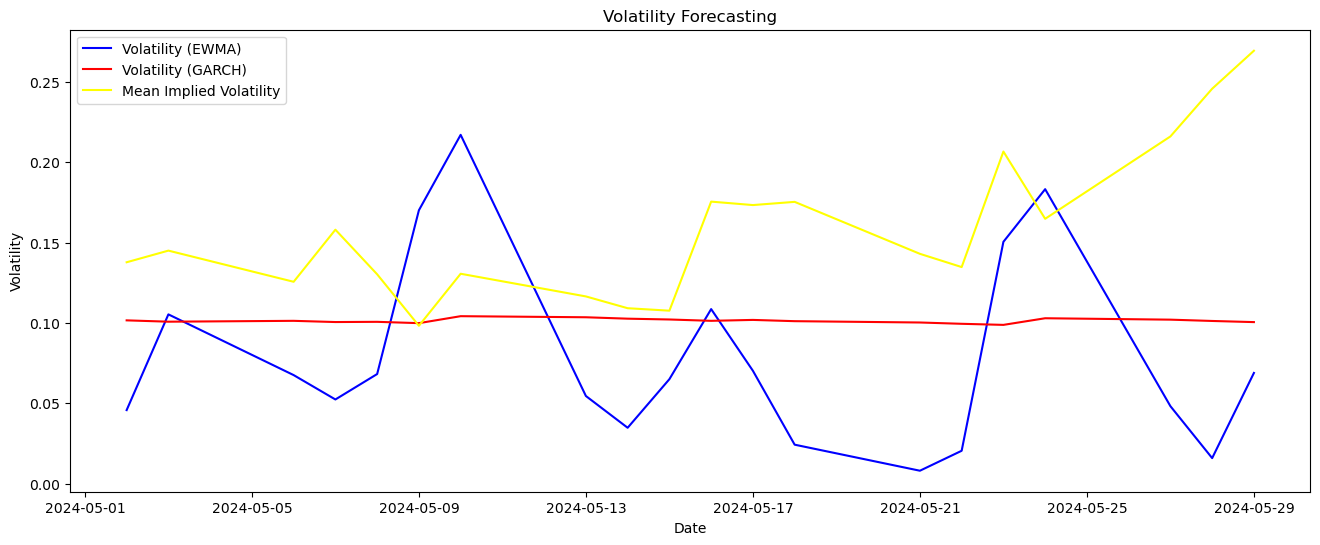

In [58]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(nifty_put_merged['Date  '], nifty_put_merged['EWMA_Vol_Annual'], label='Volatility (EWMA)', color='blue')
plt.plot(nifty_put_merged['Date  '], nifty_put_merged['GARCH_Vol_Annual'], label='Volatility (GARCH)', color='red')
plt.plot(mean_implied_volatility['Date  '], mean_implied_volatility['Mean Implied Volatility'], label='Mean Implied Volatility', color='yellow')
plt.title('Volatility Forecasting')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(False)
plt.show()

In [59]:
nifty_put_merged.to_excel('NIFTY_Put_Output.xlsx')

<Axes: xlabel='Date  ', ylabel='Option Price'>

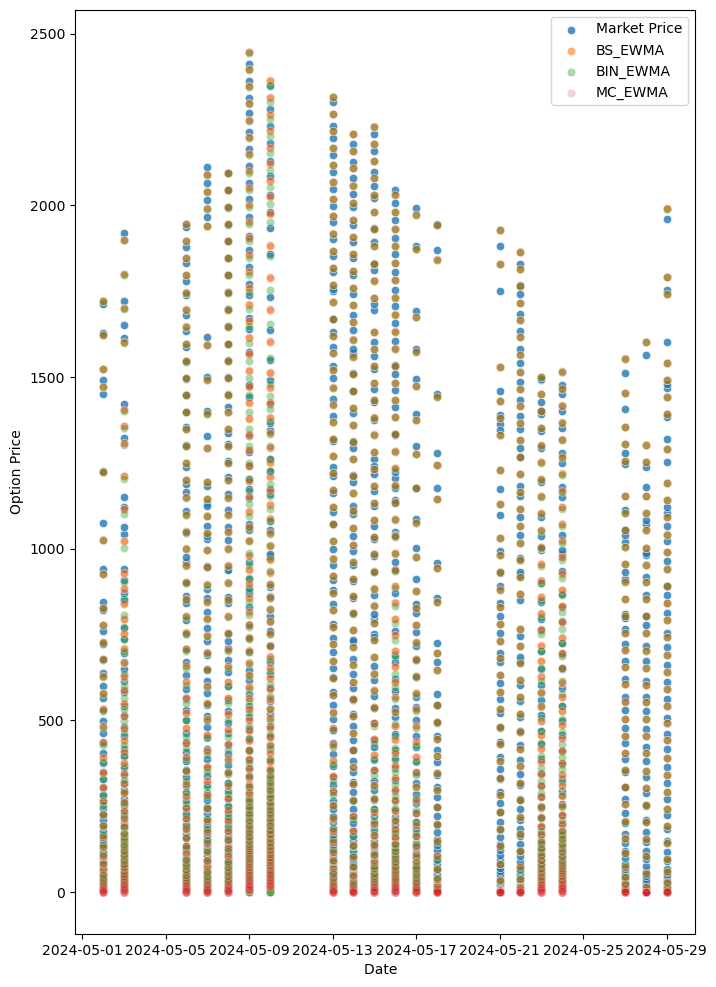

In [65]:
# Plotting Option Price vs Date 
# For EWMA
plt.figure(figsize=(8,12),dpi=100)
plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=nifty_put_merged, label='Market Price',alpha=0.8)
sns.scatterplot(x='Date  ', y='BS_EWMA', data=nifty_put_merged, label='BS_EWMA',alpha=0.6)
sns.scatterplot(x='Date  ', y='BIN_EWMA', data=nifty_put_merged, label='BIN_EWMA',alpha=0.4)
sns.scatterplot(x='Date  ', y='MC_EWMA', data=nifty_put_merged, label='MC_EWMA',alpha=0.2)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

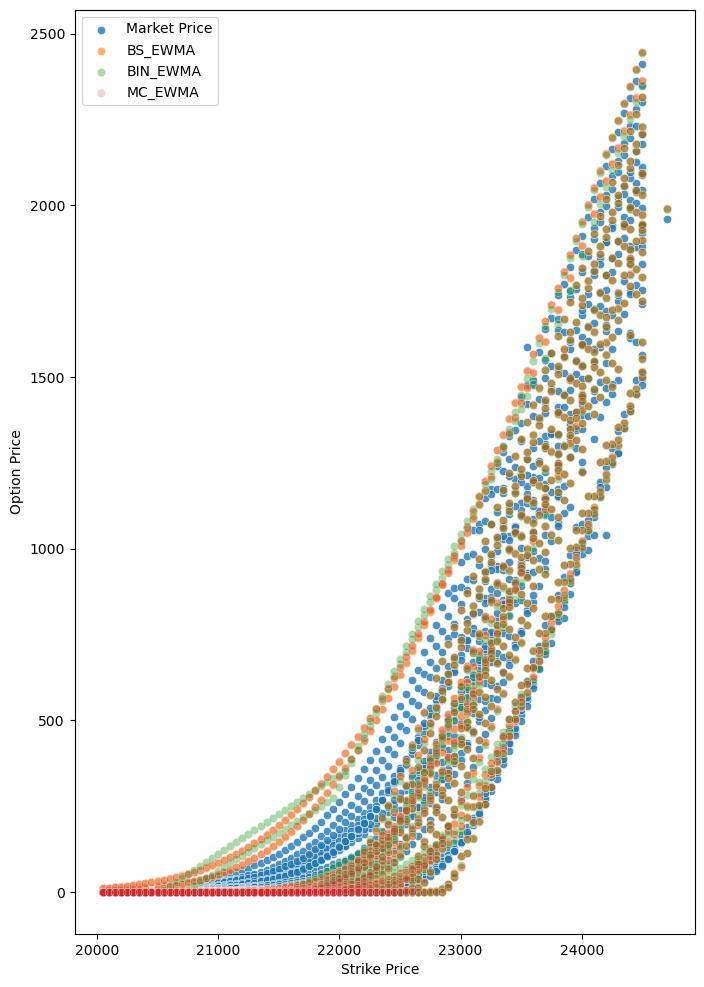

In [66]:
# Ploting Option Price vs Strike Price
# For EWMA
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=nifty_put_merged, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BS_EWMA', data=nifty_put_merged, label='BS_EWMA', alpha=0.6)
sns.scatterplot(x='Strike Price  ', y='BIN_EWMA', data=nifty_put_merged, label='BIN_EWMA', alpha=0.4)
sns.scatterplot(x='Strike Price  ', y='MC_EWMA', data=nifty_put_merged, label='MC_EWMA', alpha=0.2)


<Axes: xlabel='Date  ', ylabel='Option Price'>

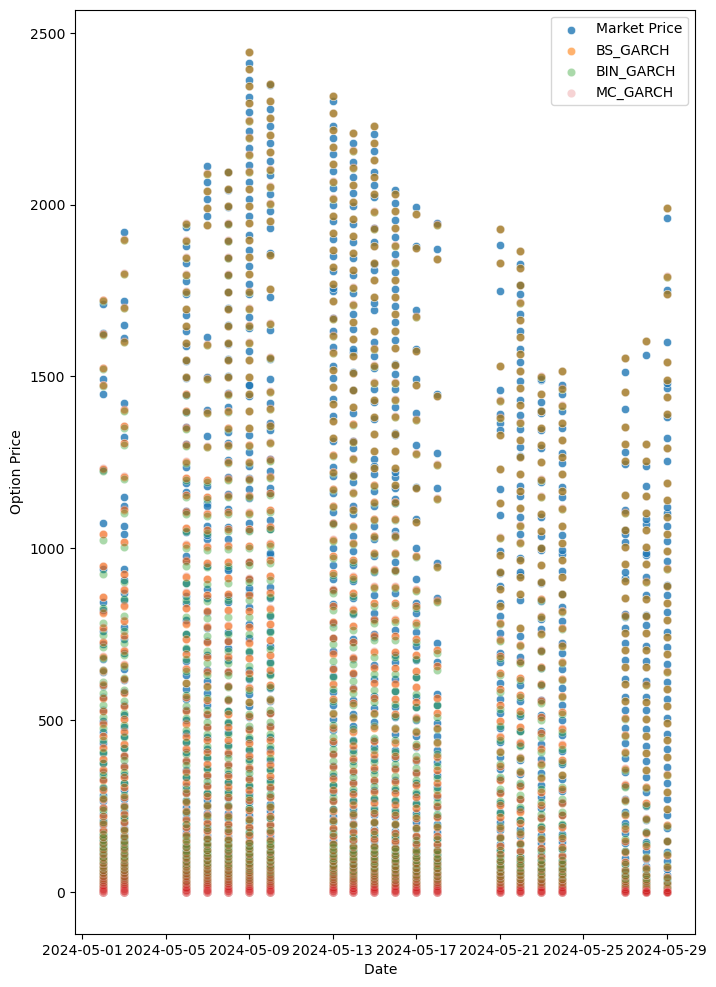

In [67]:
# Plotting Option Price vs Date 
# For GARCH
plt.figure(figsize=(8,12),dpi=100)
plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=nifty_put_merged, label='Market Price',alpha=0.8)
sns.scatterplot(x='Date  ', y='BS_GARCH', data=nifty_put_merged, label='BS_GARCH',alpha=0.6)
sns.scatterplot(x='Date  ', y='BIN_GARCH', data=nifty_put_merged, label='BIN_GARCH',alpha=0.4)
sns.scatterplot(x='Date  ', y='MC_GARCH', data=nifty_put_merged, label='MC_GARCH',alpha=0.2)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

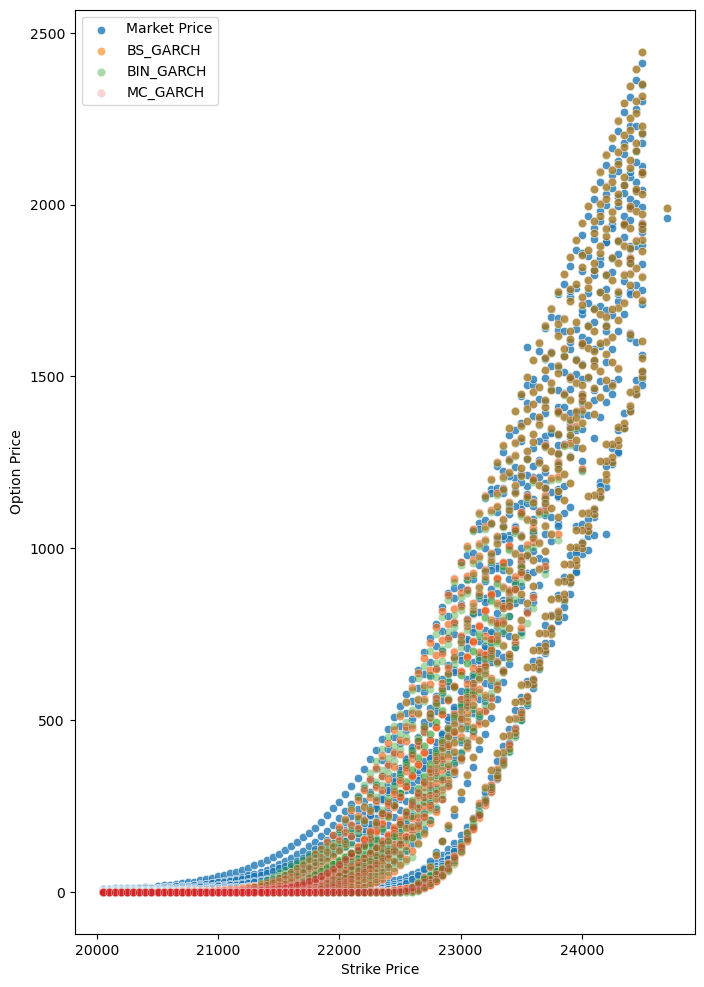

In [68]:
# Ploting Option Price vs Strike Price
# For GARCH
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=nifty_put_merged, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BS_GARCH', data=nifty_put_merged, label='BS_GARCH', alpha=0.6)
sns.scatterplot(x='Strike Price  ', y='BIN_GARCH', data=nifty_put_merged, label='BIN_GARCH', alpha=0.4)
sns.scatterplot(x='Strike Price  ', y='MC_GARCH', data=nifty_put_merged, label='MC_GARCH', alpha=0.2)